
## Would you have survived the Titanic?
### Challenge
Predict whether a passenger on the titanic would have been survived or not

### Workflow stages

1. Defining the Question or problem 
2. Data Munging 
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Classification
6. Model Evaluation

In [147]:
#import Libraries

#linear algebra
import numpy as np 

#data processing
import pandas as pd

#data visualization
import matplotlib.pyplot as plt  
import seaborn as sns 

#algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB



In [148]:
#Load the data
titanic_df = pd.read_csv('Titanic-Dataset.csv')



### Data Munging
Check for data validity, completeness, consistency and accuracy

In [149]:
titanic_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The data has 891 rows/passengers, 11 columns/features + the target variable (survived). 2 of the features are floats, 5 are integers and 5 are objects.

In [150]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training set survived the Titanic. We can also see that the ages of the passengers range from 0.4 to 80

In [151]:
#preview the data
titanic_df.head(8)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


From the data, we can note a few things. First is that we need to convert a lot of features into numeric ones later on, so that the machine learning algorithms can process them. Furthermore, we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that we need to deal with.

###### Duplicated records

In [152]:

print('The number of duplicated Record in the titanic dataset:', titanic_df.duplicated().sum())


The number of duplicated Record in the titanic dataset: 0


###### Missing values

In [153]:
def missing_values_table(df):
   
   # Total missing values
   mis_val = df.isnull().sum()
   
   # Percentage of missing values
   mis_val_percent = 100 * df.isnull().sum() / len(df)
   # Make a table with the results
   mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1, keys=['Missing Values', '% of Total Values'])
   
   # Sort the table by percentage of missing descending
   # .iloc[:, 1]!= 0: filters table to only include missing values
   mis_val_table_ren_columns = mis_val_table[
       mis_val_table.iloc[:,1] != 0].sort_values(
   '% of Total Values', ascending=False).round(2)  
   
   # Print some summary information
   print("Your selected dataframe has {} columns.".format(df.shape[1]) + '\n' +
   "There are {} columns that have missing values.".format(mis_val_table_ren_columns.shape[0]))
   
   return mis_val_table_ren_columns
   

In [154]:
missing_values_table(titanic_df)

Your selected dataframe has 12 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.



In [155]:
#dimensionality reduction through dropping
titanic_df.drop(['Cabin'],axis=1, inplace=True)

In [156]:
#impute missing values on age column with median 

titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())

In [157]:
#impure missing values on Embarked column with mode
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

###### Categorical variables

In [158]:
#object to categorical
col_cat = ['Sex', 'Name', 'Embarked', 'Ticket']
titanic_df[col_cat] = titanic_df[col_cat].astype('category')
titanic_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Embarked       category
dtype: object

In [159]:
titanic_df['Sex'].unique()

['male', 'female']
Categories (2, object): ['female', 'male']

In [160]:
#Let's map the sex variables to binary values: 1 on male and 0 on female
Sex = {'male' : '1', 'female': '0'}
titanic_df.Sex = [Sex[item] for item in titanic_df.Sex]
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [168]:
titanic_df['Embarked'].unique()

['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [ ]:
#map embarked variables to numerics on titanic_df dataset
Embarked = {'S': '0', 'C': '1', 'Q': '2'}
titanic_df.Embarked = [Embarked[item] for item in titanic_df.Embarked]


In [162]:
#Let's observe the columns
titanic_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'], dtype=object)

Above you can see the 11 features + the target variable (survived). What features could contribute to a high survival rate ?

To me, it seems every feature other than the "PassengerId", "Ticket" and "Name" would be correlated with a high survival rate

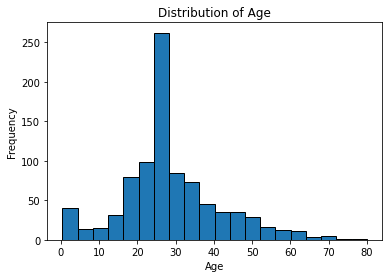

In [163]:
plt.hist(titanic_df['Age'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

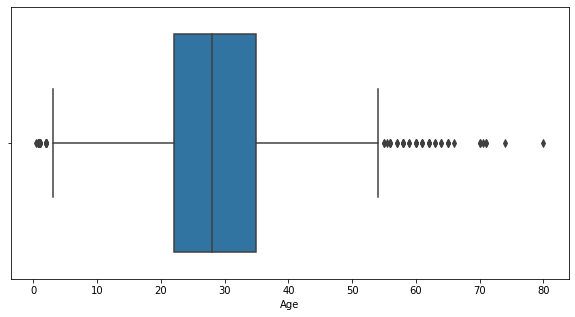

In [164]:
plt.figure(figsize=(10,5))
sns.boxplot(titanic_df['Age'])

### 1. Age and Sex

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


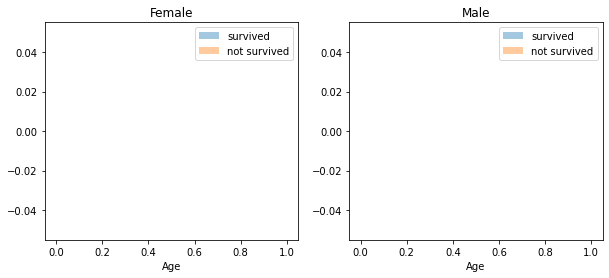

In [165]:
survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = titanic_df[titanic_df['Sex']=='female']
men = titanic_df[titanic_df.Sex == 'male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')


### Exploratory Data Analysis

Analyze, identify patterns, and explore the data Analysis

In [166]:
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

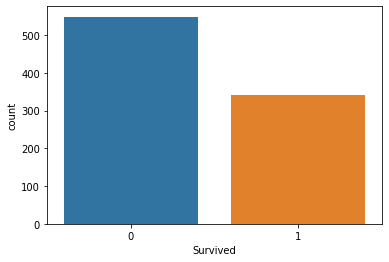

In [167]:
#visualize the count of number of survivors (Target Variable)
sns.countplot(titanic_df['Survived'], label="Count")
